<a href="https://colab.research.google.com/github/haenoya/AIproject/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A7%88%EC%9D%B4%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 기본세팅

In [1]:
# 한글폰트를 설정합니다.
#1.나눔폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

#2.런타임 다시 시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (3,839 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [2]:
# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

#3.matplotlib의 폰트를 Nanum 폰트로 지정합니다
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [73]:
import pandas as pd 
import seaborn as sns

import sklearn
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, cross_validate, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler, Binarizer
from sklearn.metrics import classification_report

import statsmodels.api as sm
import scipy.stats as stats

# 할일들
4.5 선형적인 독립변수 개발하기
+ 변수 세분화 : 모든 연속형 변수를 그룹으로 세분화 시켜서 범주형 변수로 만들기



# 데이터 전처리

In [4]:
heart = pd.read_csv("/content/SAheart.data")
heart

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...,...
457,459,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,460,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,461,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,462,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


id와 index가 맞지 않음

In [5]:
heart.rename(columns = {'row.names' : 'id'}, inplace =True)
heart

,id,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...,...
457,459,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,460,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,461,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,462,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


In [6]:
for i in range(462):
  if heart.id[i] != (i+1):
    print(i,heart.id[i])
    break

261 263


In [7]:
# 262번 id가 없음
heart.iloc[260:263]

,id,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
260,261,118,0.00,2.39,12.13,Absent,49,18.46,0.26,17,1
261,263,124,0.61,2.69,17.15,Present,61,22.76,11.55,20,0
262,264,124,1.04,2.84,16.42,Present,46,20.17,0.00,61,0


In [8]:
# id를 다시 지정
heart.id = range(1,463)
heart

,id,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...,...
457,458,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,459,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,460,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,461,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


##결측값 확인

In [9]:
# target : chd(만성폐쇄성 폐질환)
# 결측값 확인
heart.info()
# 이렇게 보면 결측값은 없음...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         462 non-null    int64  
 1   sbp        462 non-null    int64  
 2   tobacco    462 non-null    float64
 3   ldl        462 non-null    float64
 4   adiposity  462 non-null    float64
 5   famhist    462 non-null    object 
 6   typea      462 non-null    int64  
 7   obesity    462 non-null    float64
 8   alcohol    462 non-null    float64
 9   age        462 non-null    int64  
 10  chd        462 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 39.8+ KB


## 변수들의 분포 확인

In [10]:
# 수치형 변수 확인
heart.describe()

,id,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,231.500000,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017,0.346320
std,133.512172,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956,0.476313
min,1.000000,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,116.250000,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,231.500000,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,346.750000,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000,1.000000
max,462.000000,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000


In [11]:
# chd분포 확인
print('chd')
heart.chd.value_counts()

chd


0    302
1    160
Name: chd, dtype: int64

In [12]:
# famhist 분포 확인
print('famhist')
heart.famhist.value_counts()

famhist


Absent     270
Present    192
Name: famhist, dtype: int64

sbp


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


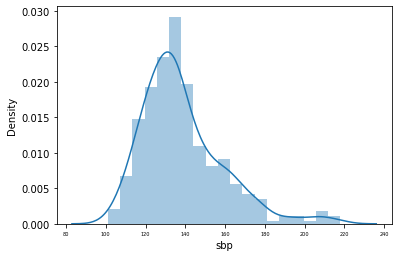

tobacco


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


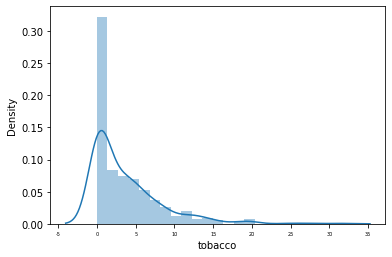

ldl


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


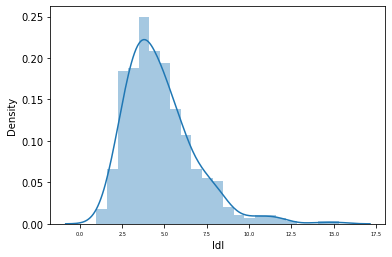

adiposity


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


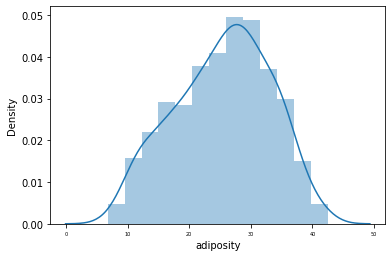

typea


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


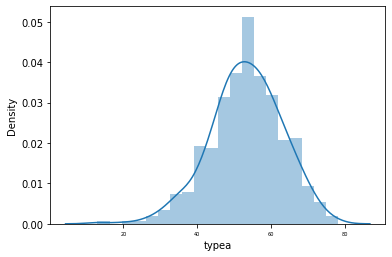

obesity


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


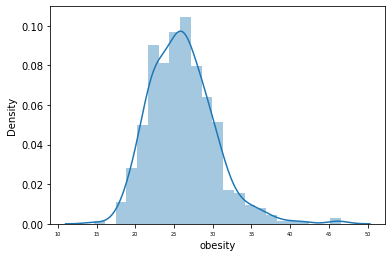

alcohol


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


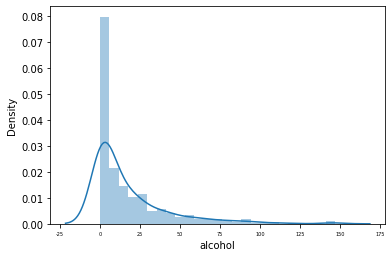

age


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


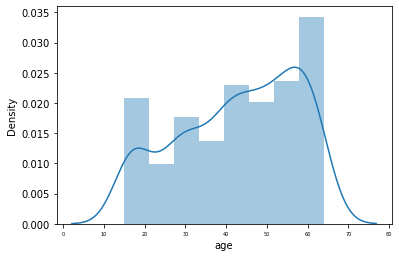

In [65]:
col = ['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']

for i in col:
  print(i)
  sns.distplot(heart[i])
  plt.show()
  plt.close()

## 이상치 확인

In [14]:
data = []
for i in col:
  data.append(heart[i])
data

[0      160
 1      144
 2      118
 3      170
 4      134
       ... 
 457    214
 458    182
 459    108
 460    118
 461    132
 Name: sbp, Length: 462, dtype: int64, 0      12.00
 1       0.01
 2       0.08
 3       7.50
 4      13.60
        ...  
 457     0.40
 458     4.20
 459     3.00
 460     5.40
 461     0.00
 Name: tobacco, Length: 462, dtype: float64, 0       5.73
 1       4.41
 2       3.48
 3       6.41
 4       3.50
        ...  
 457     5.98
 458     4.41
 459     1.59
 460    11.61
 461     4.82
 Name: ldl, Length: 462, dtype: float64, 0      23.11
 1      28.61
 2      32.28
 3      38.03
 4      27.78
        ...  
 457    31.72
 458    32.10
 459    15.23
 460    30.79
 461    33.41
 Name: adiposity, Length: 462, dtype: float64, 0      49
 1      55
 2      52
 3      51
 4      60
        ..
 457    64
 458    52
 459    40
 460    64
 461    62
 Name: typea, Length: 462, dtype: int64, 0      25.30
 1      28.87
 2      29.14
 3      31.99
 4      25.99
       

sbp, tobacco, ldl, typea, obesity, alcohol에 이상치 존재

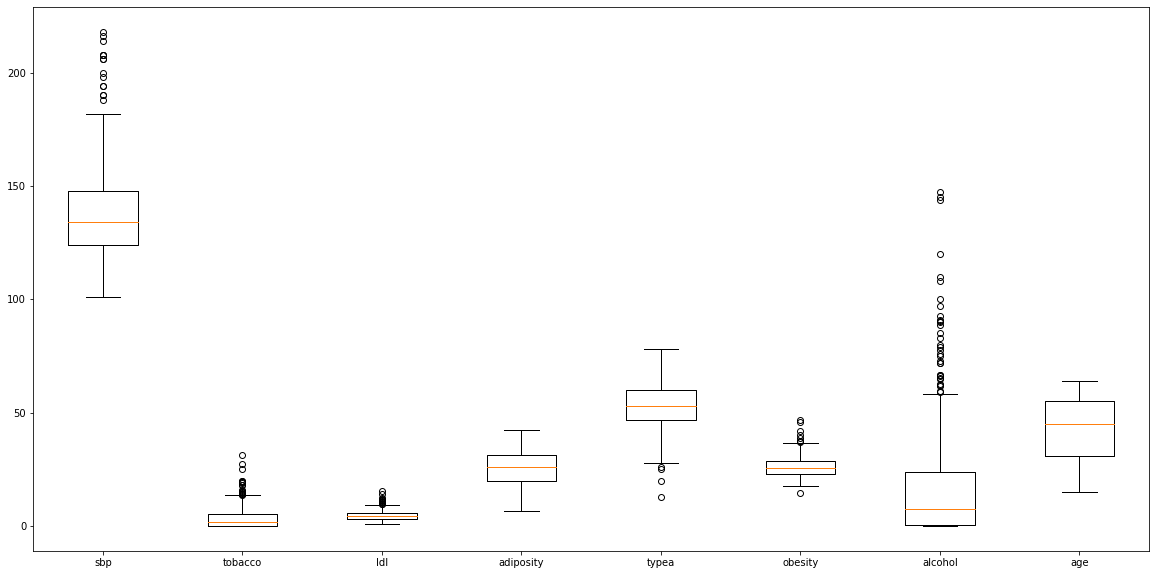

In [15]:
plt.figure(figsize = (20,10))
plt.boxplot(data)
plt.xticks(range(1,9), col)
plt.rc('xtick', labelsize=10) 
plt.show()
plt.close()

sbp


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


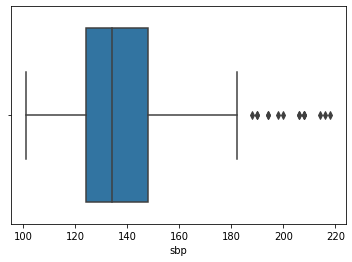

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


tobacco


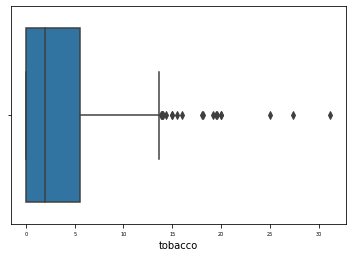

ldl


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


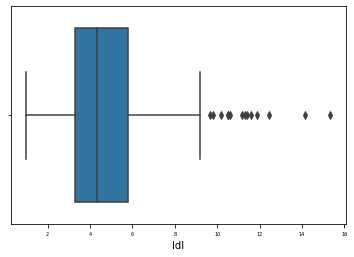

adiposity


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


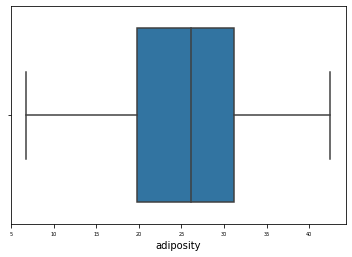

typea


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


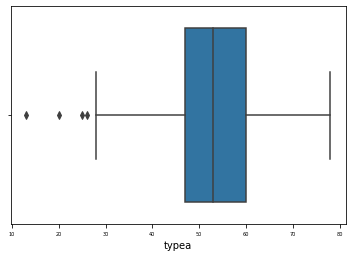

obesity


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


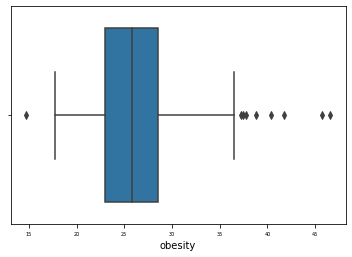

alcohol


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


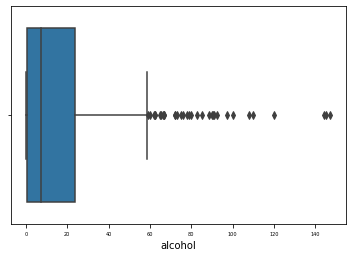

age


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


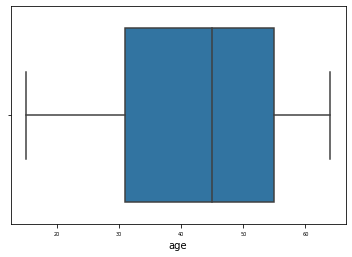

In [16]:
for i in col:
  print(i)
  sns.boxplot(heart[i])
  plt.rc('xtick', labelsize=5) 
  plt.show()
  plt.close()

## 타겟을 제외한 범주형 변수 인코딩

present : 1

abscent : 0

In [17]:
le = LabelEncoder()
le = le.fit(heart.famhist)
heart.famhist = le.transform(heart.famhist)
heart

,id,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...,...
457,458,214,0.40,5.98,31.72,0,64,28.45,0.00,58,0
458,459,182,4.20,4.41,32.10,0,52,28.61,18.72,52,1
459,460,108,3.00,1.59,15.23,0,40,20.09,26.64,55,0
460,461,118,5.40,11.61,30.79,0,64,27.35,23.97,40,0


## 정규 분포 형태의 표준 스케일링 적용

famhist는 빼고 해야하나?

In [33]:
scaler = StandardScaler()
data_scale = scaler.fit_transform(heart.iloc[:, 1:-1])

# 0. 데이터셋 분리

In [34]:
heart.iloc[:,1:-1].columns
data_scale = pd.DataFrame(data_scale, columns = heart.iloc[:,1:-1].columns)
data_scale

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
0,1.058564,1.823073,0.478412,-0.295503,1.185854,-0.418470,-0.176786,3.277738,0.629336
1,0.277089,-0.790237,-0.159680,0.412140,-0.843274,0.193344,0.671373,-0.612745,1.383115
2,-0.992806,-0.774980,-0.609245,0.884332,1.185854,-0.112563,0.735519,-0.541183,0.218184
3,1.546985,0.842264,0.807126,1.624141,1.185854,-0.214532,1.412621,0.295062,1.040488
4,-0.211332,2.171805,-0.599577,0.305351,1.185854,0.703189,-0.012856,1.647775,0.423760
...,...,...,...,...,...,...,...,...,...
457,3.696039,-0.705234,0.599263,0.812281,-0.843274,1.111065,0.571590,-0.696983,1.040488
458,2.133091,0.123004,-0.159680,0.861173,-0.843274,-0.112563,0.609602,0.068519,0.629336
459,-1.481228,-0.138545,-1.522877,-1.309364,-0.843274,-1.336191,-1.414575,0.392385,0.834912
460,-0.992806,0.384553,3.320823,0.692625,-0.843274,1.111065,0.310252,0.283203,-0.192969


In [35]:
X_train, X_test, y_train, y_test = train_test_split(data_scale,
                                                    heart.iloc[:,-1,],
                                                    test_size = 0.25,
                                                    shuffle = True,
                                                    random_state = 100)
print('train data - ', X_train)
print('train target - ', y_train)
print('test data - ', X_test)
print('test target - ', y_test)

train data -            sbp   tobacco       ldl  adiposity   famhist     typea   obesity  \
344 -0.064806 -0.530868 -0.773602  -0.197720 -0.843274  1.315003 -0.454754   
370  0.472458  0.994834  1.454887   1.164816  1.185854 -0.724377  0.115437   
136 -1.090491 -0.203932 -0.507730  -1.529376 -0.843274  0.193344 -1.167492   
64  -0.406701 -0.792417 -1.411694  -1.924370 -0.843274  0.397282 -0.944168   
197  1.156248 -0.155981 -0.536734   0.762102 -0.843274  0.907127  1.317589   
..        ...       ...       ...        ...       ...       ...       ...   
343 -0.015964 -0.602794 -1.387524  -1.224446 -0.843274 -0.928315  0.170080   
359  0.667826 -0.426248 -0.560905   0.002994 -0.843274 -0.316501  0.234227   
323  0.081721  1.082017 -0.406216   0.868892  1.185854 -0.112563  0.585844   
280 -1.578912 -0.557023 -0.179016   0.086624 -0.843274  1.416972 -0.469009   
8   -1.188175 -0.792417 -0.440054  -0.772841  1.185854 -0.418470 -0.281321   

      alcohol       age  
344  1.143166 -0.398545

# 1. 99백분위수*2 넘어서면 이상치로 판단

  99백분위수*2 넘어가는 것 X

In [21]:
for i in col:
  outlier = heart[i].quantile(0.99)*2
  print(heart.loc[heart[i] <= outlier,i].count())

462
462
462
462
462
462
462
462


일단 모델 적합해보기

## 로지스틱 회귀분석

chd 분포) 0 : 1 = 2: 1

In [22]:
# chd분포 확인
heart.chd.value_counts()

0    302
1    160
Name: chd, dtype: int64

In [38]:
# SMOTE
smote = SMOTE(random_state = 100)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

print('shape - ', X_train.shape, y_train.shape)
print('레이블 분포 - \n', y_train.value_counts())
print()
print('shape - ', X_train_over.shape, y_train_over.shape)
print('smote 적용 후 레이블 값 분포 - \n', y_train_over.value_counts())

shape -  (346, 9) (346,)
레이블 분포 - 
 0    232
1    114
Name: chd, dtype: int64

shape -  (464, 9) (464,)
smote 적용 후 레이블 값 분포 - 
 0    232
1    232
Name: chd, dtype: int64


In [39]:
lr = LogisticRegression()
lr.fit(X_train_over, y_train_over)
lr_preds = lr.predict(X_test)

print(classification_report(y_test, lr_preds))

              precision    recall  f1-score   support

           0       0.75      0.70      0.73        70
           1       0.59      0.65      0.62        46

    accuracy                           0.68       116
   macro avg       0.67      0.68      0.67       116
weighted avg       0.69      0.68      0.68       116



tobacco, ldl, famhist, typea, age 변수가 chd에 영향을 미침

In [36]:
logit = sm.Logit(heart.iloc[:, -1], data_scale)
result = logit.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.575170
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.108     
Dependent Variable: chd              AIC:              549.4572  
Date:               2022-05-24 11:44 BIC:              586.6773  
No. Observations:   462              Log-Likelihood:   -265.73   
Df Model:           8                LL-Null:          -298.05   
Df Residuals:       453              LLR p-value:      5.6564e-11
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|    [0.025  0.975]
------------------------------------------------------------------
sbp             0.1428    0.1171   1.2200  0.2225  -0.0866  0.3723
tobacco         0.3971    0.1321   3.0062  0.0026   0.1382  0.6560
ldl             0.3351    0.1241   2.7003  0.0069   0.0919  0.5783
adiposity       0.1093    0.2146   0.5090  0.6107  -0.3114  0.5299
famhist         0.4047    0.1066   3.7948  0.0001   0.1957  0.6137
typea           0.3198    0.1109   2.8847  0.0039   0.1025  0.5372
obesity        -0.2427    0.1741  -1.3946  0.1631  -0.5839  0.0984
alcohol        -0.0344    0.1070  -0.3212  0.7480  -0.2441  0.1753
age             0.4647    0.1579   2.9424  0.0033   0.1551  0.7742
=================================================================

"""

ldl, famhist, typea, age 변수가 chd에 영향을 미침

모델 설명력이 너무 낮음

In [40]:
logit = sm.Logit( y_train_over, X_train_over)
result = logit.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.528342
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.238     
Dependent Variable: chd              AIC:              508.3010  
Date:               2022-05-24 11:48 BIC:              545.5600  
No. Observations:   464              Log-Likelihood:   -245.15   
Df Model:           8                LL-Null:          -321.62   
Df Residuals:       455              LLR p-value:      4.7759e-29
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|    [0.025  0.975]
------------------------------------------------------------------
sbp             0.1100    0.1285   0.8554  0.3924  -0.1420  0.3619
tobacco         0.2337    0.1354   1.7261  0.0843  -0.0317  0.4992
ldl             0.4308    0.1292   3.3341  0.0009   0.1776  0.6841
adiposity       0.0567    0.2350   0.2413  0.8093  -0.4038  0.5172
famhist         0.6246    0.1114   5.6057  0.0000   0.4062  0.8429
typea           0.3307    0.1210   2.7337  0.0063   0.0936  0.5678
obesity        -0.2589    0.1842  -1.4055  0.1599  -0.6200  0.1022
alcohol        -0.0012    0.1059  -0.0114  0.9909  -0.2088  0.2064
age             0.7750    0.1762   4.3978  0.0000   0.4296  1.1204
=================================================================

"""

## 선형적인 독립변수 개발

In [66]:
col

['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']

In [68]:
for c in col:
  heart[c + '_grp'] = 0
  for i in heart.index:
    if heart[c][i] <= heart[c].quantile(0.1):
      heart[c + '_grp'][i] = 1
    elif heart[c][i] <= heart[c].quantile(0.2):
      heart[c + '_grp'][i] = 2
    elif heart[c][i] <= heart[c].quantile(0.3):
      heart[c + '_grp'][i] = 3
    elif heart[c][i] <= heart[c].quantile(0.4):
      heart[c + '_grp'][i] = 4
    elif heart[c][i] <= heart[c].quantile(0.5):
      heart[c + '_grp'][i] = 5
    elif heart[c][i] <= heart[c].quantile(0.6):
      heart[c + '_grp'][i] = 6
    elif heart[c][i] <= heart[c].quantile(0.7):
      heart[c + '_grp'][i] = 7
    elif heart[c][i] <= heart[c].quantile(0.8):
      heart[c + '_grp'][i] = 8
    elif heart[c][i] <= heart[c].quantile(0.9):
      heart[c + '_grp'][i] = 9
    else:
      heart[c + '_grp'][i] = 10
heart

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying

,id,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd,sbp_grp,a_grp,tobacco_grp,ldl_grp,adiposity_grp,typea_grp,obesity_grp,alcohol_grp,age_grp
0,1,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1,9,0,10,8,4,3,5,10,7
1,2,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1,7,0,3,6,7,6,8,4,10
2,3,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0,1,0,3,3,8,5,9,5,6
3,4,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1,10,0,9,9,10,4,10,8,8
4,5,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1,5,0,10,3,6,8,6,10,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,458,214,0.40,5.98,31.72,0,64,28.45,0.00,58,0,10,0,3,8,8,9,8,1,8
458,459,182,4.20,4.41,32.10,0,52,28.61,18.72,52,1,10,0,7,6,8,5,8,7,7
459,460,108,3.00,1.59,15.23,0,40,20.09,26.64,55,0,1,0,6,1,2,1,1,8,8
460,461,118,5.40,11.61,30.79,0,64,27.35,23.97,40,0,1,0,8,10,8,9,7,8,4


In [70]:
heart.drop('a_grp', axis = 1, inplace= True)
heart

,id,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd,sbp_grp,tobacco_grp,ldl_grp,adiposity_grp,typea_grp,obesity_grp,alcohol_grp,age_grp
0,1,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1,9,10,8,4,3,5,10,7
1,2,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1,7,3,6,7,6,8,4,10
2,3,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0,1,3,3,8,5,9,5,6
3,4,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1,10,9,9,10,4,10,8,8
4,5,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1,5,10,3,6,8,6,10,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,458,214,0.40,5.98,31.72,0,64,28.45,0.00,58,0,10,3,8,8,9,8,1,8
458,459,182,4.20,4.41,32.10,0,52,28.61,18.72,52,1,10,7,6,8,5,8,7,7
459,460,108,3.00,1.59,15.23,0,40,20.09,26.64,55,0,1,6,1,2,1,1,8,8
460,461,118,5.40,11.61,30.79,0,64,27.35,23.97,40,0,1,8,10,8,9,7,8,4


카이제곱 검정

In [75]:
result = pd.crosstab(heart.chd, heart.sbp_grp)
result

sbp_grp,1,2,3,4,5,6,7,8,9,10
chd,,,,,,,,,,
0,49,23,30,36,36,33,24,32,24,15
1,18,9,13,11,17,15,14,18,19,26


In [76]:
stats.chi2_contingency(observed = result)

(22.624952543944282,
 0.007095882848205596,
 9,
 array([[43.7965368 , 20.91774892, 28.10822511, 30.72294372, 34.64502165,
         31.37662338, 24.83982684, 32.68398268, 28.10822511, 26.8008658 ],
        [23.2034632 , 11.08225108, 14.89177489, 16.27705628, 18.35497835,
         16.62337662, 13.16017316, 17.31601732, 14.89177489, 14.1991342 ]]))

# 2. 3IQR 넘어서면 이상치로 판단

일단 모델 적합해보기